In [13]:
function rungeKutta4(f::Function,t0,tf,x0,delta)
    tArray = []
    xArray = []
    
    #=Como siempre agregamos los primeros puntos a los arreglos=#

    push!(tArray,t0)
    push!(xArray,x0)
    
    #=Definimos las funciones de Runge Kutta=#
    
    f1(x,t) = f(x,t)
    f2(x,t) = f(x+(delta/2)*f1(x,t),t+(delta/2))
    f3(x,t) = f(x+(delta/2)*f2(x,t),t+(delta/2))
    f4(x,t) = f(x+(delta)*f3(x,t),t+delta)
    
    rungeFunction(x,t) = x+(delta/6)*(f1(x,t)+2*f2(x,t) +2*f3(x,t)+f4(x,t))
    
    while(last(tArray)<tf)
        push!(xArray,rungeFunction(last(xArray),last(tArray)))
        push!(tArray,last(tArray)+delta)
        
    end
    
    return [tArray,xArray]
    
end

rungeKutta4 (generic function with 1 method)



## Ejercicio 1: Resolver con Runge-Kutta orden 4 el sistema: 
\begin{align} 
\dot x &= y-y^3\ \dot y &= -x -y^2 
\end{align}

a) Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.
Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.

b) Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.


In [11]:
#=Hacemos primero una función que nos arroje numeros aleatorios flotantes entre un número inicial y uno final =#
function randomFloat(initial::Float64, final::Float64)
    
   return initial +(final -initial)*rand() 
    
end

randomFloat (generic function with 1 method)

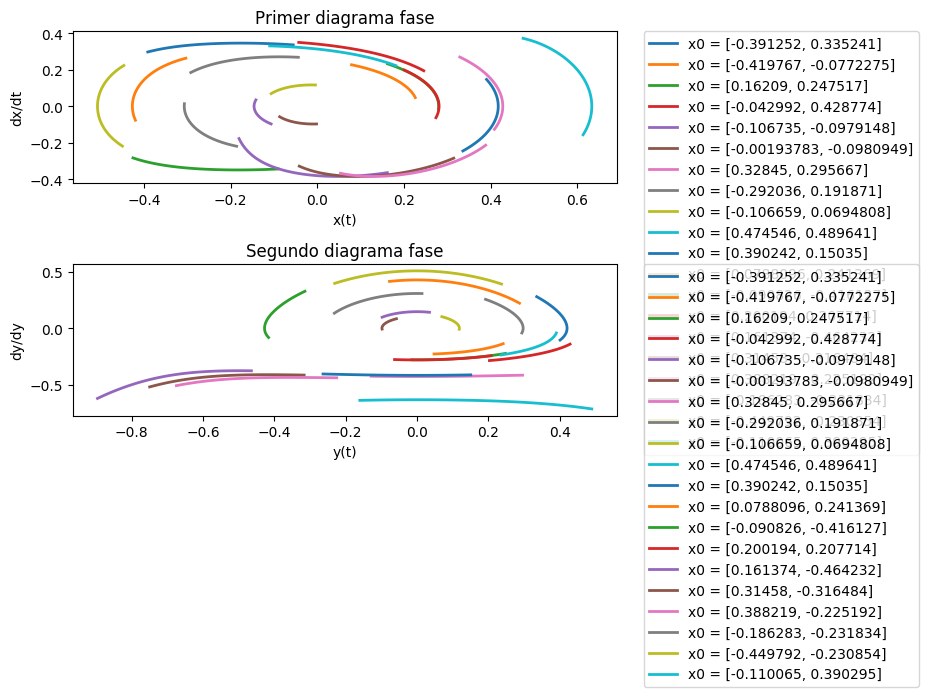

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fc381046750>

In [38]:

using PyPlot
plt = PyPlot

#Acorde al diagrama que nos dan deberiamos tener un punto silla. 
f(x,t) = [x[2]-x[2]^3,-x[1]-x[2]^2]
condicionesIniciales = []
initial = -0.5
final = 0.5
solucion = []
xCord(x) = x[1]
yCord(x)=x[2]
derivada = []
#Llenamos el arreglo de condiciones iniciales. 
for i in 1:20
    push!(condicionesIniciales,[randomFloat(initial,final),randomFloat(initial,final)])
end

for condicion in condicionesIniciales
    solucion = rungeKutta4(f,initial,final,condicion,0.01)
    derivada = f.(solucion[2],solucion[1])
    
    
    #=Primer diagrama fase=#
    plt.subplot(2,1,1)
    plt.xlabel("x(t)")
    plt.ylabel("dx/dt")
    plt.title("Primer diagrama fase")
    plt.grid()
    plt.tight_layout()
    plt.plot(xCord.(solucion[2]),xCord.(derivada),label = "x0 = $(condicion)",linewidth =2)    
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
    
    plt.subplot(2,1,2)
    plt.xlabel("y(t)")
    plt.ylabel("dy/dy")
    plt.tight_layout()
    plt.title("Segundo diagrama fase")
    plt.grid()
    plt.plot(yCord.(solucion[2]),yCord.(derivada),label = "x0 = $(condicion)",linewidth =2)    
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
end
    ax = gca()



 


Cálculo del jacobiano. 

Tenemos una funciún de la forma $f(x,y) = (u(x,y),v(x,y))$ por lo cual el jacobiano tiene la siguiente forma 

$$ J=
  \left( {\begin{array}{cc}
   \frac{\partial u}{\partial x} & \frac{\partial u}{\partial y} \\
   \frac{\partial v}{\partial x} & \frac{\partial v}{\partial y} \\
  \end{array} } \right)$$
  
 Calculemoslo 
 
 \begin{aligned}
 &u(x,y) = y-y^3 \\
 &v(x,y) =-x-y^2 \\
 &\to  \frac{\partial u}{\partial x} = 0 , \frac{\partial u}{\partial y} = 1-3y^2 , \frac{\partial v}{\partial x} = -1 ,  \frac{\partial v}{\partial y} = -2y 
 \end{aligned}
 
 Asi que 
 $$ J(x,y) =
  \left( {\begin{array}{cc}
   0 & 1-3y^2 \\
   -1 & -2y \\
  \end{array} } \right)$$
  
  y evaluado en cero 
 $$ J(0,0) =
  \left( {\begin{array}{cc}
   0 & 1 \\
   -1 & 0 \\
  \end{array} } \right)$$
  
 La traza es $$\tau = 0$$
 y el determinante $$\Delta = -1$$
 Por lo cual, según el diagrama que se nos proporcionó dicho punto sería un punto silla. ya que el determinante es negativo 


## Ejercicio 2: Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol: $${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$


Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular?
Usen $\mu=0.5$.
Grafiquen varias trayectorias en los espacios $(x,t)$ y $(y=\dot x,t)$.


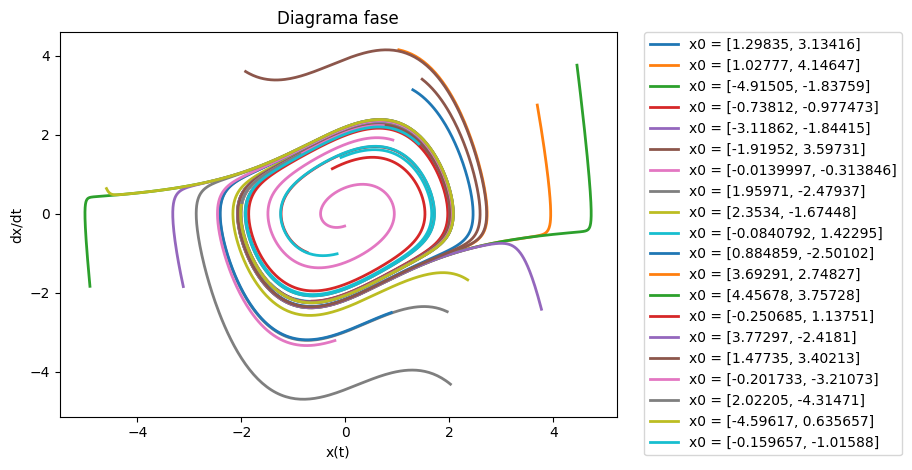

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f252203d090>

In [12]:
#Aqui se hacen las graficas del espacio fase. 
using PyPlot
plt = PyPlot


#Acorde al diagrama que nos dan deberiamos tener un punto silla. 
f(x,t) = [x[2],-x[1]+0.5*(1-x[1]^2)*x[2]]
condicionesIniciales = []
initial = -5.
final = 5.
solucion = []
xCord(x) = x[1]
yCord(x)=x[2]
derivada = []
#Llenamos el arreglo de condiciones iniciales. 
for i in 1:20
    push!(condicionesIniciales,[randomFloat(initial,final),randomFloat(initial,final)])
end

for condicion in condicionesIniciales
    solucion = rungeKutta4(f,initial,final,condicion,0.01)
    derivada = f.(solucion[2],solucion[1])
    
    
    #=Primer diagrama fase=#

    plt.xlabel("x(t)")
    plt.ylabel("dx/dt")
    plt.title("Diagrama fase")
    plt.grid()
    plt.tight_layout()
    plt.plot(xCord.(solucion[2]),xCord.(derivada),label = "x0 = $(condicion)",linewidth =2)    
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
end

    ax = gca()

    # add new limits from 0 - 100
 

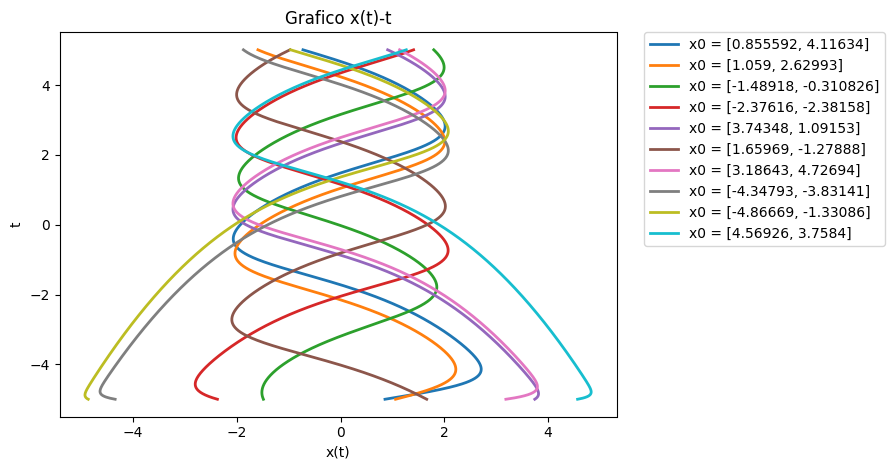

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f2521b208d0>

In [10]:
#Aqui se hacen el gráfico de (x,t)

using PyPlot
plt = PyPlot


#Acorde al diagrama que nos dan deberiamos tener un punto silla. 
f(x,t) = [x[2],-x[1]+0.5*(1-x[1]^2)*x[2]]
condicionesIniciales = []
initial = -5.
final = 5.
solucion = []
xCord(x) = x[1]
yCord(x)=x[2]

#Llenamos el arreglo de condiciones iniciales. 
for i in 1:10
    push!(condicionesIniciales,[randomFloat(initial,final),randomFloat(initial,final)])
end

for condicion in condicionesIniciales
    solucion = rungeKutta4(f,initial,final,condicion,0.01)
    
    
    #=Primer diagrama fase=#
    plt.xlabel("x(t)")
    plt.ylabel("t")
    plt.title("Grafico x(t)-t")
    plt.grid()
    plt.tight_layout()
    plt.plot(xCord.(solucion[2]),solucion[1],label = "x0 = $(condicion)",linewidth =2)    
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
    

end

    ax = gca()


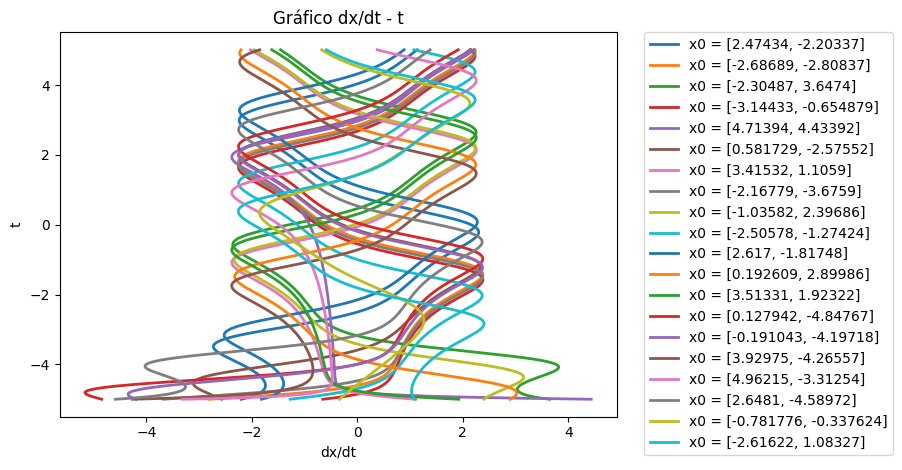

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f2520e69cd0>

In [11]:
#=Por ultiimo el gráfico dx/dx -t=#
#Aqui se hacen las graficas del espacio fase. 
using PyPlot
plt = PyPlot

f(x,t) = [x[2],-x[1]+0.5*(1-x[1]^2)*x[2]]
condicionesIniciales = []
initial = -5.
final = 5.
solucion = []
xCord(x) = x[1]
yCord(x)=x[2]
derivada = []
#Llenamos el arreglo de condiciones iniciales. 
for i in 1:20
    push!(condicionesIniciales,[randomFloat(initial,final),randomFloat(initial,final)])
end

for condicion in condicionesIniciales
    solucion = rungeKutta4(f,initial,final,condicion,0.01)
    derivada = f.(solucion[2],solucion[1])
    
    
    plt.xlabel("dx/dt")
    plt.ylabel("t")
    plt.title("Gráfico dx/dt - t")
    plt.grid()
    plt.tight_layout()
    plt.plot(xCord.(derivada),solucion[1],label = "x0 = $(condicion)",linewidth =2)    
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
end

    ax = gca()



## Ejercicio 3: Graficar muchas trayectorias del sistema del ejercicio 1 en el espacio de fase. Utílicen rangos apropiados de acuerdo a donde vimos que estan los puntos fijos.


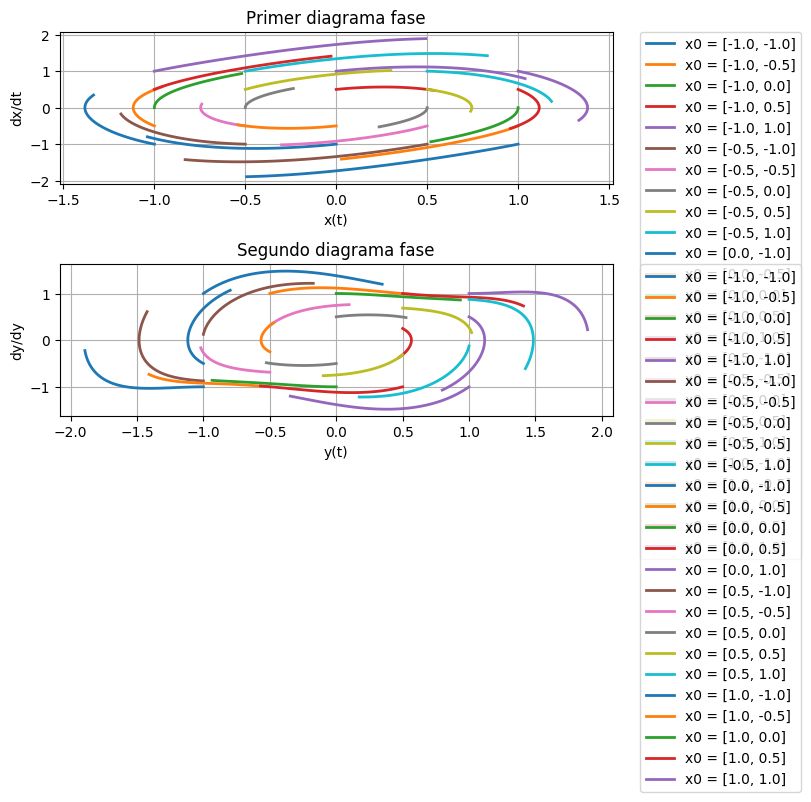

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f1264b39d10>

In [8]:
#=Segun lo que calculamos las trayectorias que converjen estan cercanas a cero. Simplemente ahora en vez de graficar la solución de condiciones iniciales aleatorias, vamos a graficar en un intervalo que este cerca del cero. =#
using PyPlot
plt = PyPlot

f(x,t) = [x[2],-x[1]+0.5*(1-x[1]^2)*x[2]]

#=Llenamos el arreglo de condiciones iniciales=#
condicionesIniciales = []
for i in linspace(-1,1,5)
    for j in linspace(-1,1,5)
    
    #=Son 25 condiciones iniciales las que vamos a probar=#
    push!(condicionesIniciales,[i,j])    
    end
end
    
initial = -0.5
final = 0.5
solucion = []
xCord(x) = x[1]
yCord(x)=x[2]
derivada = []

for condicion in condicionesIniciales
    solucion = rungeKutta4(f,initial,final,condicion,0.01)
    derivada = f.(solucion[2],solucion[1])
    
    
    #=Primer diagrama fase=#
    plt.subplot(2,1,1)
    plt.xlabel("x(t)")
    plt.ylabel("dx/dt")
    plt.title("Primer diagrama fase")
    plt.grid()
    plt.tight_layout()
    plt.plot(xCord.(solucion[2]),xCord.(derivada),label = "x0 = $(condicion)",linewidth =2)    
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
    
    plt.subplot(2,1,2)
    plt.xlabel("y(t)")
    plt.ylabel("dy/dy")
    plt.tight_layout()
    plt.title("Segundo diagrama fase")
    plt.grid()
    plt.plot(yCord.(solucion[2]),yCord.(derivada),label = "x0 = $(condicion)",linewidth =2)    
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
end
    ax = gca()


## Ejercicio 4: Hacer lo mismo para el sistema: \begin{align} \dot x&= x+y-x (x^2+y^2)\ \dot y &= y-x-y(x^2+y^2) \end{align} Y comprobar numéricamente que hay un repulsor en $(0,0)$ y un ciclo límite (conjunto atractor) en $x^2+y^2=1$, para cotejar con lo que vimos en clase.

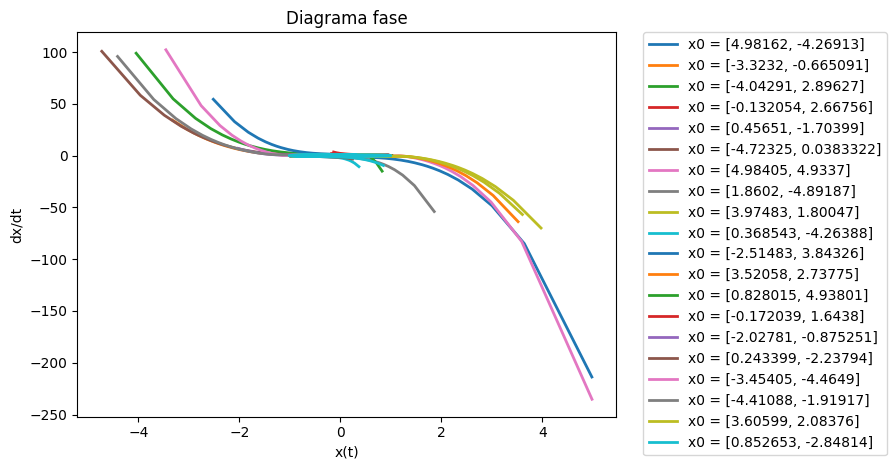

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f1264bb6690>

In [14]:
#=Graficamos los diagramas fase =#
#Aqui se hacen las graficas del espacio fase. 
using PyPlot
plt = PyPlot

f(x,t) = [x[1]+x[2]-x[1]*(x[1]^2 +x[2]^2),x[2]-x[1]-x[2]*(x[1]^2 +x[2]^2)]
condicionesIniciales = []
initial = -5.
final = 5.
solucion = []
xCord(x) = x[1]
yCord(x)=x[2]
derivada = []
#Llenamos el arreglo de condiciones iniciales. 
for i in 1:20
    push!(condicionesIniciales,[randomFloat(initial,final),randomFloat(initial,final)])
end

for condicion in condicionesIniciales
    solucion = rungeKutta4(f,initial,final,condicion,0.01)
    derivada = f.(solucion[2],solucion[1])
    
    
    #=Primer diagrama fase=#

    plt.xlabel("x(t)")
    plt.ylabel("dx/dt")
    plt.title("Diagrama fase")
    plt.grid()
    plt.tight_layout()
    plt.plot(xCord.(solucion[2]),xCord.(derivada),label = "x0 = $(condicion)",linewidth =2)    
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
end

    ax = gca()

    # add new limits from 0 - 100
 

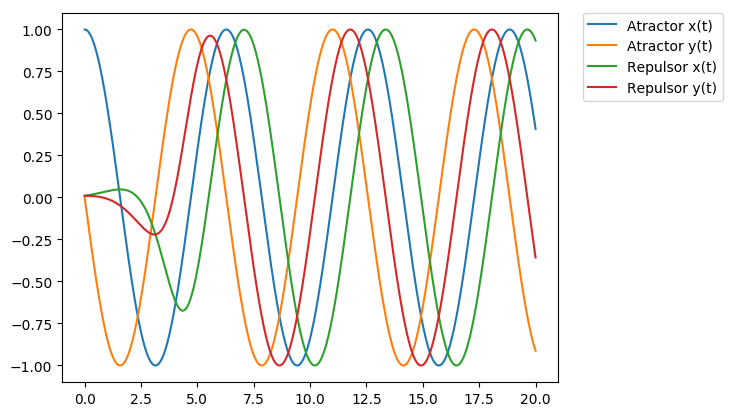

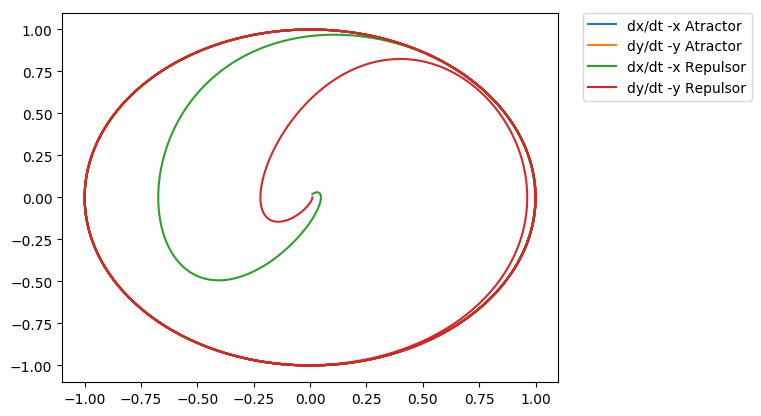

PyObject <matplotlib.legend.Legend object at 0x7f1263d278d0>

In [20]:
#=En primer lugar veamos el repulsor y el atractor que nos piden=#

f(x,t) = [x[1]+x[2]-x[1]*(x[1]^2 +x[2]^2),x[2]-x[1]-x[2]*(x[1]^2 +x[2]^2)]
solucionRepulsion = rungeKutta4(f,0,20,[0.01,0.01],0.01)
solucionAtraccion = rungeKutta4(f,0,20,[1,0],0.01)

derivadaRepulsion = f.(solucionRepulsion[2],0)
derivadaAtraccion = f.(solucionAtraccion[2],0)
xCord(x) = x[1]
yCord(x) = x[2]

using PyPlot
plt = PyPlot
#=Se grafican las soluciones respecto al tiempo de los atractores y repulsores=#
plt.figure()
plt.plot(solucionAtraccion[1],xCord.(solucionAtraccion[2]),label = "Atractor x(t)")
plt.plot(solucionAtraccion[1],yCord.(solucionAtraccion[2]),label = "Atractor y(t)")
plt.plot(solucionRepulsion[1],xCord.(solucionRepulsion[2]),label = "Repulsor x(t)")
plt.plot(solucionRepulsion[1],yCord.(solucionRepulsion[2]),label = "Repulsor y(t)")
plt.show()
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
#=Se grafican los diagramas fase de los atractores y los repulsores. =#
plt.figure()
plt.plot(xCord.(solucionAtraccion[2]),xCord.(derivadaAtraccion),label = "dx/dt -x Atractor")
plt.plot(yCord.(solucionAtraccion[2]),yCord.(derivadaAtraccion),label = "dy/dt -y Atractor")
plt.plot(xCord.(solucionRepulsion[2]),xCord.(derivadaRepulsion),label = "dx/dt -x Repulsor")
plt.plot(yCord.(solucionRepulsion[2]),yCord.(derivadaRepulsion),label = "dy/dt -y Repulsor")
plt.show()

    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)


Vemos que las soluciones de repulsion se ven empujadas fuera del punto (0,0) y luego atrapadas por el atractor. 

Cálculo del jacobiano. 


$$ J=
  \left( {\begin{array}{cc}
   \frac{\partial u}{\partial x} & \frac{\partial u}{\partial y} \\
   \frac{\partial v}{\partial x} & \frac{\partial v}{\partial y} \\
  \end{array} } \right)$$
  
 Calculemoslo 
 
 \begin{aligned}
 &u(x,y) = x+y-x(x^2 +y^2) \\
 &v(x,y) =y-x-y(x^2 +y^2) \\
 &\to  \frac{\partial u}{\partial x} = 1-3x^2 -y^2 , \frac{\partial u}{\partial y} = 1-2xy, \frac{\partial v}{\partial x} = -1-2xy ,  \frac{\partial v}{\partial y} = 1-x^2-3y^2 
 \end{aligned}
 
 Asi que 
 $$ J(x,y) =
  \left( {\begin{array}{cc}
   1-3x^2 -y^2 & 1-2xy \\
   -1-2xy & 1-x^2-3y^2 \\
  \end{array} } \right)$$
  
  y evaluado en cero 
 $$ J(0,0) =
  \left( {\begin{array}{cc}
   1 & 1 \\
   -1 & 1 \\
  \end{array} } \right)$$
  
 La traza es $$\tau = 2$$
 y el determinante $$\Delta = 2$$
 Por lo cual, según el diagrama que se nos proporcionó dicho punto sería una espiral inestable, esto se puede observar bastante bien en los diagramas fase que ya sacamos. 
 
Si $x^2 +y^2 = 1$ las funciones cambiarian a $u(x,y) = x+y-x$ y $v(x,y) = y-x-y$

y el jacobiano seria 
 $$ J(x,y) =
  \left( {\begin{array}{cc}
   0 & 1 \\
   -1 & 0 \\
  \end{array} } \right)$$

cuya traza es $\Delta = 0$ y cuyo determinante es $|J| = 1$

según nuestro diagrama esto corresponde a un centro. i.e. un punto estable